=======================================================================================================

Nama : Evan Juanto

Batch : BSD-006



=======================================================================================================

Link Tableau : [Click Me](https://public.tableau.com/app/profile/evan.juanto/viz/milestone1_17176650660810/Dashboard1?publish=yes)

# Business Understanding

Background : 

Working at Nintendo as Data Analyst, We want to know which games are flying off the shelves, what platforms players prefer, and how factors like genre and release year influence sales. Armed with this knowledge, we can tailor our marketing and distribution strategies to maximize our impact.

SMART Goals : 

Our goal is to understand factors driving video game popularity globally, explore market trends over time, and formulate effective strategies to enhance 10 % in overall sales. Leveraging available sales data, we aim to deepen our understanding of video game industry dynamics and optimize marketing and distribution strategies for sustainable global sales growth in 12 months.

In order to accomplish that, I want to analyze :

- What are the top 10 selling games based on global sales all platform?

- What genre games have been made the most to the least frequently?

- What Top 6 year released the most games?

- The Top 5 platform that sells the most games from global sales?

- Do sales in the EU have a correlation with global sales?

- Is there a significant difference in global sales between `PS3`, `PS4` and `X360` platforms?

# Data Loading 

In [1]:
#import library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

This data is a information about video game sales, including ratings, game name, release platform, release year, genre, publisher, and sales in various regions such as North America, Europe, Japan, and other regions around the world.

I got this data from : [Click ME](https://www.kaggle.com/datasets/thedevastator/global-video-game-sales)



```sql
SELECT ALL 
FROM vgsales.csv
```

In [2]:
# Import the CSV file that has been downloaded
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In this data set there are 11 columns :

- Rank - Ranking of overall sales

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.

### Data Exploration

In [3]:
# to see the first 5 data .head()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# to see the number of uniques in Rank Columns .nunique()
df['Rank'].nunique()

16598

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# check duplicate rows .duplicated().sum()
df.duplicated().sum()

0

In [7]:
# check missing values .isnull().sum()
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

`Year` column have 271 missing values , and `Publisher` column have 58 missing values

In [8]:
df.isnull().mean()

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Because the data missing values ​​were smaller than 5%, I decided to delete the rows with missing values

Our data consist 10 columns and 16.598 rows. Unfortunately we have missing values in our data which are in `Year` and `Publisher` columns. We will take out the rows later on. 


and the `Year` still has an inappropriate data type. we will change it later.


`Rank` is the primary key because none of them are the same.

# Data Cleaning

We will remove data that has missing values

In [9]:
# drop rows with missing values .dropna
df = df.dropna()
# to check missing values after we remove data
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Change data type `Year` from Float to Interger

In [10]:
# change the year data type from float to interger with .astype
df['Year'] = df['Year'].astype(int)

After we change it, we can check whether it is finished

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


Checking Outliers

Look for the skewness value of `Global_Sales` to see the data distribution so you can determine the method to use for checking outliers

In [12]:
# .skew to see skew value
df['Global_Sales'].skew()

17.30431167518343

Extremely skewed distributed data so uses Turkey's Rule

In [13]:
q1 = df['Global_Sales'].quantile(0.25)
q3 = df['Global_Sales'].quantile(0.75)
iqr = q3-q1
# data extreme skewed use 3*iqr
up_bound = q3 + 3*iqr
low_bound = q1 - 3*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')


Upper Boundary: 1.74
Lower Boundary: -1.20


In [14]:
outlier = df['Global_Sales'][(df['Global_Sales']<low_bound) | (df['Global_Sales']>up_bound)]
no_outlier = df['Global_Sales'][(df['Global_Sales']>=low_bound) & (df['Global_Sales']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["Global_Sales"]):.2f}%%')

Percentage of outliers: 6.16%%


Because the Outliers are greater than 5% I will not drop the data, because the number is too large

Save the cleaned data to a CSV file

In [15]:
#save file
df.to_csv("vgsalesclean.csv",index=False)

we have changed everything we found in the exploration data.

Because the data has been cleaned we can proceed to data analysis and calculations

# Calculation and Analysis

### 1. What are the top 10 selling games based on global sales?

In [16]:
df_top10 = df.groupby(by= ['Name'])['Global_Sales'].sum().sort_values(ascending=False).head(10) 
#Combine the Name column and Global_Sales column that have been added up with sum()
df_top10 = pd.DataFrame(df_top10) #make a series into a data frame
df_top10

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Modern Warfare 3,30.83
New Super Mario Bros.,30.01


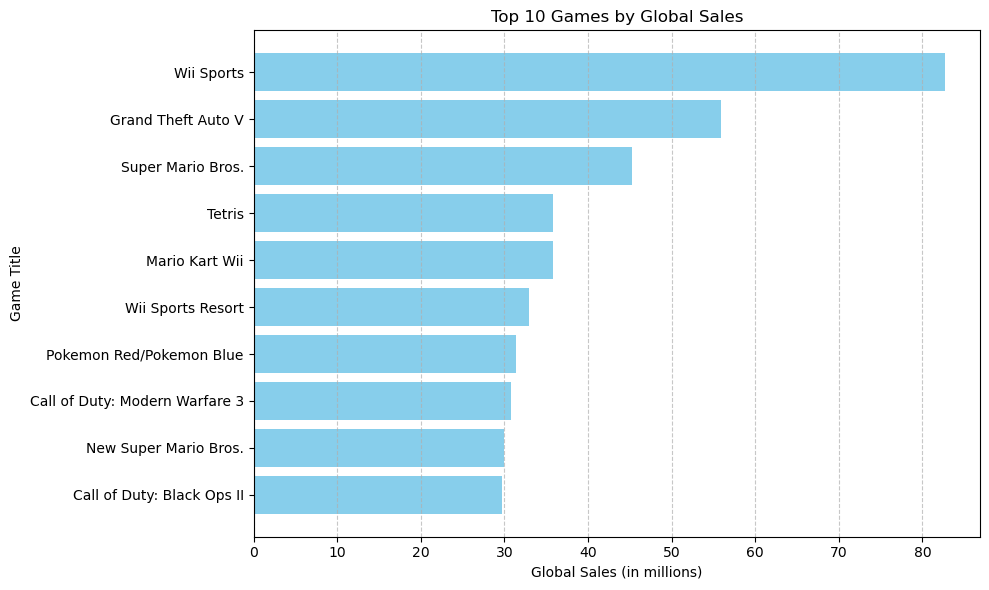

In [17]:
# visualize dataframe using matplotlib library
plt.figure(figsize=(10, 6))
plt.barh(df_top10.index, df_top10['Global_Sales'], color='skyblue')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.title('Top 10 Games by Global Sales')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The top 10 selling games globally across all platforms include titles such as Wii Sports, Super Mario Bros., and "Mario Kart Wii," indicating a preference for well-established franchises and family-friendly titles.

The game with the most global sales is Wii Sports followed by Grand Theft Auto V

### 2. What genre games have been made the most to the least frequently?

In [18]:
dftes = df.groupby(by=['Genre'])['Rank'].count().sort_values(ascending=False)
#Combine the Genre column and Rank column that have been Count with Count()
dftes = pd.DataFrame(dftes) #make a series into a data frame
dftes


,Rank
Genre,
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282
Adventure,1274
Racing,1225
Platform,875
Simulation,848


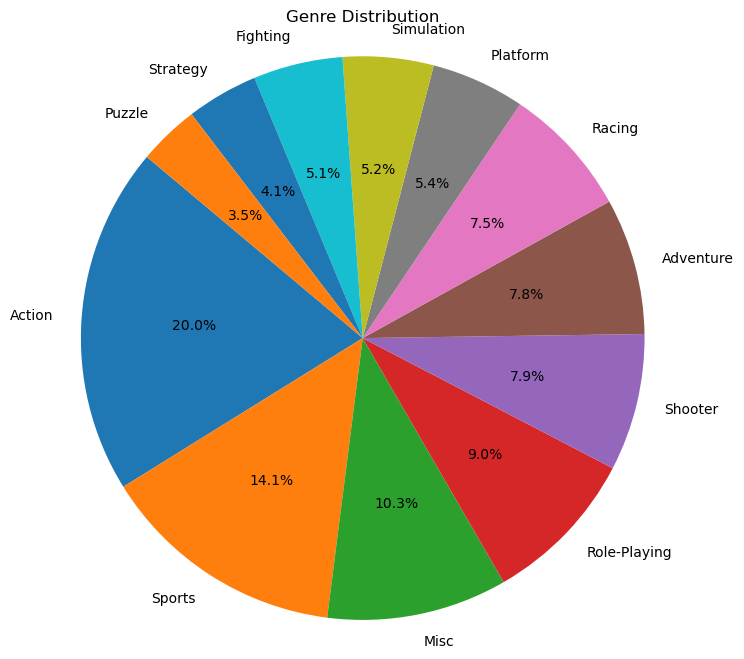

In [19]:
# visualize dataframe using matplotlib library
plt.figure(figsize=(8, 8))
plt.pie(dftes['Rank'], labels=dftes.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Genre Distribution')
plt.show()

Action and Sports are the most frequently produced genres, suggesting a demand for engaging and competitive gaming experiences.

### 3. Which top 6 year had the most game release?

In [20]:
dftes2 = df.groupby(by=['Year'])['Rank'].count().sort_values(ascending=False).head(6)
#Combine the Year column and Rank column that have been Count with Count()
dftes2 = pd.DataFrame(dftes2) #make a series into a data frame
dftes2


,Rank
Year,
2009,1431
2008,1428
2010,1257
2007,1201
2011,1136
2006,1008


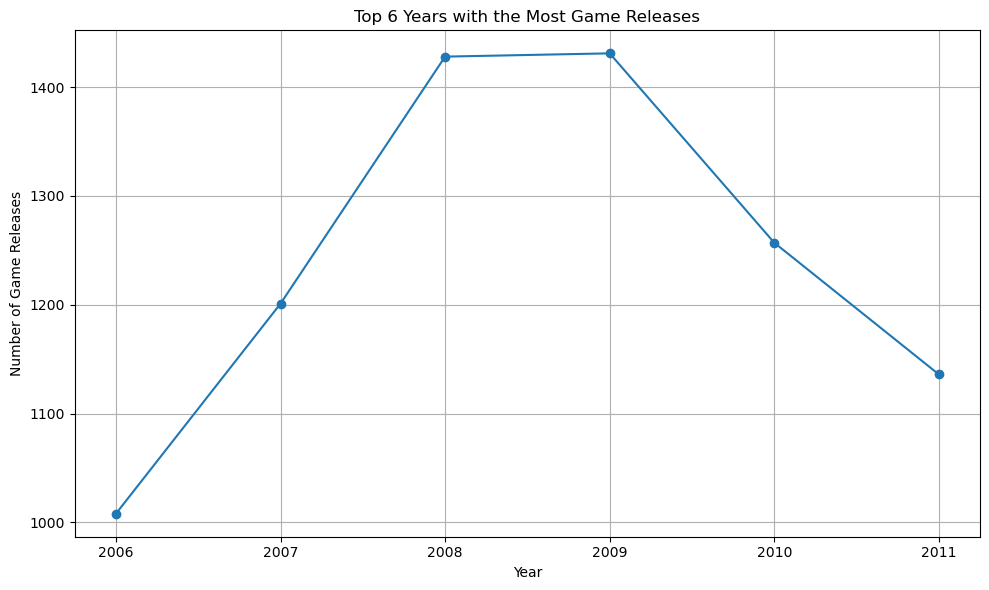

In [21]:
dftes2_sorted = dftes2.sort_index()

# visualize dataframe using matplotlib library
plt.figure(figsize=(10, 6))
plt.plot(dftes2_sorted.index, dftes2_sorted['Rank'], marker='o', linestyle='-')
plt.title('Top 6 Years with the Most Game Releases')
plt.xlabel('Year')
plt.ylabel('Number of Game Releases')
plt.grid(True)
plt.xticks(dftes2_sorted.index)  # Set x-axis ticks to be the years
plt.tight_layout()
plt.show()

The years 2008, 2009, 2010, 2011, 2006, and 2007 saw the highest number of game releases, indicating periods of significant activity and innovation in the industry.

the increase was very rapid from 2006-2009, but after 2009 there was a decline in game releases

### 4. The Top 5 platform that sells the most games from global sales?

In [22]:
df_platform = df.groupby(by=['Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
#Combine the Platform column and Global_Sales column that have been added up with sum()
df_platform = pd.DataFrame(df_platform) #make a series into a data frame
df_platform

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91


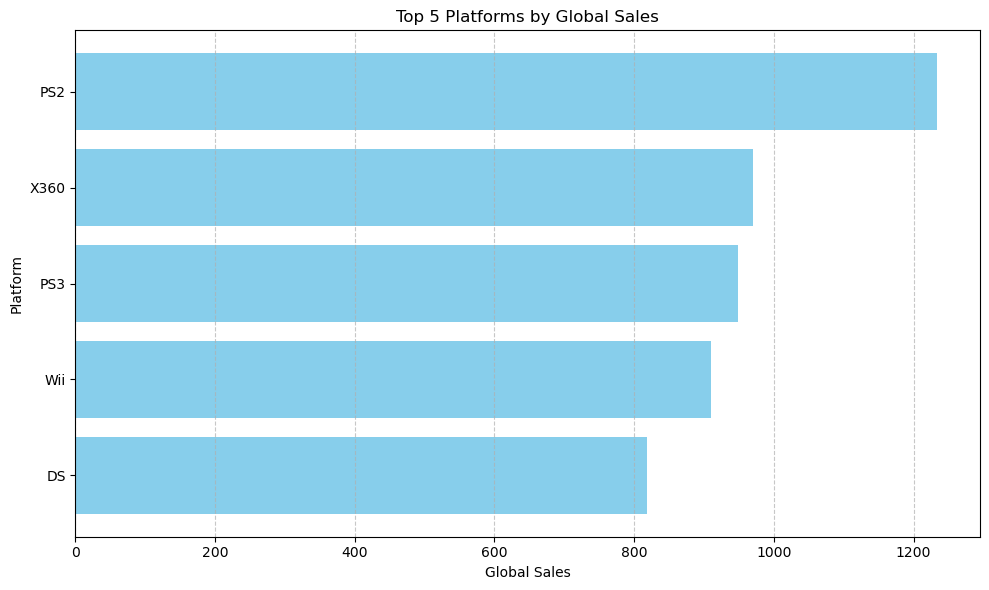

In [23]:
# visualize dataframe using matplotlib library
plt.figure(figsize=(10, 6))
plt.barh(df_platform.index, df_platform['Global_Sales'], color='skyblue')
plt.xlabel('Global Sales')
plt.ylabel('Platform')
plt.title('Top 5 Platforms by Global Sales')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The top 5 platforms driving global game sales are likely to be Nintendo's Wii, DS, Sony's PS2, PS3, and Microsoft's Xbox 360, showcasing the dominance of these consoles in the market

PS2 has the most users on the market

### 5. Do sales in the EU have a correlation with global sales?

To be able to see the distribution of this data, we have to look for the skew value to determine the method that will be used

In [24]:
#find skewness value with .skew
skew_eu = df['EU_Sales'].skew()
skew_global = df['Global_Sales'].skew()
print(f'Skew EU_Sales: {skew_eu}')
print(f'Skew Global_Sales: {skew_global}')

Skew EU_Sales: 18.77479616528877
Skew Global_Sales: 17.30431167518343


`EU_Sales` and `Global_Sales` data distribution are skewed

Using descriptive statistical calculations using the Spearman method

In [25]:
#using spearman because the data distribution is skewed
corr_rho, pval_s = stats.spearmanr(df['EU_Sales'], df['Global_Sales'])
print(f"rho-correlation: {corr_rho:.2f}")

rho-correlation: 0.70


The correlation is positive and because the value is closer to 1, the correlation is strong

There appears to be a correlation between sales in the EU and global sales, indicating that the European market significantly impacts overall game sales.

### 6. Is there a significant difference in global sales between `PS3`, `PS4` and `X360` platforms?

Using the hypothesis test used is Anova

calculating inferential statistics

In [26]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
#Extracting Global_Data data for each category
ps3 = df['Global_Sales'][df['Platform']=='PS3']
x360 = df['Global_Sales'][df['Platform']=='X360']
ps4 = df['Global_Sales'][df['Platform']=='PS4']
#Find the average .mean()
print(f'average global sales of PS3: {ps3.mean()}')
print(f'average global sales of X360: {x360.mean()}')
print(f'average global sales of PS4: {ps4.mean()}')

average global sales of PS3: 0.7280291411042945
average global sales of X360: 0.785737439222042
average global sales of PS4: 0.8276785714285715


H0 there is no significant change in global sales of these 3 consoles 


H1 there is a significant change in global sales of these 3 consoles

In [28]:
# using Anova with library scipy
res = stats.f_oneway(ps3, x360, ps4)
print('P-value:',res.pvalue)

P-value: 0.46570707860035887


p-value is greater than 0.05, H0 fails to reject, so there is no significant change in global sales of PS3, X360, PS4

Upon further analysis, it appears that there is no significant difference in global sales between PS3, PS4, and X360 platforms. This suggests that consumer preferences for gaming platforms may not be solely based on the release year or generation of the console. Other factors such as game titles available, pricing, and marketing strategies may play a more significant role in driving sales across different platforms. Therefore, a more comprehensive evaluation of these factors is needed to understand the dynamics influencing global sales across gaming platforms

# Conclusion

The conclusion of my analysis:

- The top 10 selling games globally across all platforms include titles such as Wii Sports, Super Mario Bros., and "Mario Kart Wii," indicating a preference for well-established franchises and family-friendly titles.
The game with the most global sales is Wii Sports followed by Grand Theft Auto V

- Action and Sports are the most frequently produced genres, suggesting a demand for engaging and competitive gaming experiences.

- The years 2008, 2009, 2010, 2011, 2006, and 2007 saw the highest number of game releases, indicating periods of significant activity and innovation in the industry.
The increase was very rapid from 2006-2009, but after 2009 there was a decline in game releases

- The top 5 platforms driving global game sales are likely to be Nintendo's Wii, DS, Sony's PS2, PS3, and Microsoft's Xbox 360, showcasing the dominance of these consoles in the market.
PS2 has the most users on the market

- There appears to be a correlation between sales in the EU and global sales, indicating that the European market significantly impacts overall game sales.

- Upon further analysis, it appears that there is no significant difference in global sales between PS3, PS4, and X360 platforms. This suggests that consumer preferences for gaming platforms may not be solely based on the release year or generation of the console. Other factors such as game titles available, pricing, and marketing strategies may play a more significant role in driving sales across different platforms. Therefore, a more comprehensive evaluation of these factors is needed to understand the dynamics influencing global sales across gaming platforms

# Business Recommendations

- Based on a analysis of the gaming market trends, it is evident that Nintendo possesses a strong foundation with its established franchises and family-friendly titles. To further drive global sales, Nintendo should strategically leverage these assets, ensuring that they remain at the forefront of marketing initiatives. Additionally, by targeting the Action and Sports genres, Nintendo can broaden its appeal to a wider audience, thereby increasing market share and sustaining long-term growth.

- Furthermore, recognizing the significance of the European market in driving overall sales, Nintendo should allocate resources towards strategic partnerships and tailored marketing campaigns in this region. By enhancing brand visibility and catering to the unique preferences of European gamers, Nintendo can maximize its sales potential and strengthen its position in the global gaming landscape.

- Moreover, while the analysis initially suggested a preference for newer console generations, a closer examination revealed that the difference in global sales between PS3, PS4, and X360 platforms is not statistically significant. Therefore, Nintendo should adopt a holistic approach to game development and promotion, catering to both current and previous console generations to capture a diverse consumer base and adapt to evolving market dynamics.

- By implementing these strategies, Nintendo can capitalize on its strengths, effectively navigate market trends, and position itself for sustainable global sales growth in the competitive gaming industry.